In [1]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import datetime


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read csv file and convert into dataframe
df = pd.read_csv(r"avocado.csv")
df.head(20)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


### * Information related to different features

    Unnamed	-  SNo.
    Date  -  The date of the observation
    AveragePrice  -  the average price of a single avocado
    Total Volume  -  Total number of avocados sold
    4046  -  Total number of avocados with PLU 4046 sold
    4225  -  Total number of avocados with PLU 4225 sold
    4770  -  Total number of avocados with PLU 4770 sold
    Total Bags	-  Total Number of Bags sold
    Small Bags  -  Total Number of Small Bags sold
    Large Bags  -  Total Number of Large Bags sold
    XLarge Bags  -  Total Number of XLarge Bags sold
    type  -  Organic or Conventional
    year  -  The year of observation
    region  -  the city or region of the observation

* here the data looks like arranged sequencially by region. we need to shuffle it to get good results.

In [3]:
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace = True)
df

,index,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1063,23,2015-07-19,1.00,173741.30,111744.79,24068.98,647.13,37280.40,17718.50,19561.90,0.00,conventional,2015,Jacksonville
1,11622,0,2015-12-27,1.07,7851.73,1347.91,935.80,12.36,5555.66,214.52,5341.14,0.00,organic,2015,StLouis
2,15583,47,2017-02-05,1.14,149650.50,4548.46,70014.08,0.00,75087.96,20170.52,54917.44,0.00,organic,2017,GreatLakes
3,4114,6,2016-11-13,1.52,2075282.76,589046.77,723968.74,99449.47,662817.78,562621.68,97915.02,2281.08,conventional,2016,Midsouth
4,9247,17,2015-08-30,1.60,12626.20,2524.44,5164.04,715.02,4222.70,4219.94,2.76,0.00,organic,2015,BaltimoreWashington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,5674,5,2017-11-26,1.12,412213.00,211077.00,27773.00,903.00,172460.00,113141.00,55576.00,3743.00,conventional,2017,Atlanta
18245,10782,44,2015-02-22,1.76,2584.79,1346.61,31.51,0.00,1206.67,1206.67,0.00,0.00,organic,2015,Orlando
18246,12522,17,2016-08-28,1.02,34300.17,9948.68,259.53,0.00,24091.96,23775.82,316.14,0.00,organic,2016,DallasFtWorth
18247,325,13,2015-09-27,1.04,5216784.63,1860050.39,2635028.38,206460.07,515245.79,496867.66,13336.34,5041.79,conventional,2015,California


In [4]:
#Lets check for null values in the dataset
df.isnull().sum()

index           0
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
#Lets look at the info relates to data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         18249 non-null  int64  
 1   Unnamed: 0    18249 non-null  int64  
 2   Date          18249 non-null  object 
 3   AveragePrice  18249 non-null  float64
 4   Total Volume  18249 non-null  float64
 5   4046          18249 non-null  float64
 6   4225          18249 non-null  float64
 7   4770          18249 non-null  float64
 8   Total Bags    18249 non-null  float64
 9   Small Bags    18249 non-null  float64
 10  Large Bags    18249 non-null  float64
 11  XLarge Bags   18249 non-null  float64
 12  type          18249 non-null  object 
 13  year          18249 non-null  int64  
 14  region        18249 non-null  object 
dtypes: float64(9), int64(3), object(3)
memory usage: 2.1+ MB


By looking at data types, we can see that date is not datetime, so we will solve this problem and sort the data by date. Then will divide the dates into day-month-year for a better analysis.

In [7]:
dates = [datetime.datetime.strptime(ts, "%Y-%m-%d") for ts in df['Date']]
df['Year'], df['Month'],  df['Day'] = df['Date'].str.split('-').str
df.head(10)

,index,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,1063,23,2015-07-19,1.00,173741.30,111744.79,24068.98,647.13,37280.40,17718.50,19561.90,0.00,conventional,2015,Jacksonville,2015,07,19
1,11622,0,2015-12-27,1.07,7851.73,1347.91,935.80,12.36,5555.66,214.52,5341.14,0.00,organic,2015,StLouis,2015,12,27
2,15583,47,2017-02-05,1.14,149650.50,4548.46,70014.08,0.00,75087.96,20170.52,54917.44,0.00,organic,2017,GreatLakes,2017,02,05
3,4114,6,2016-11-13,1.52,2075282.76,589046.77,723968.74,99449.47,662817.78,562621.68,97915.02,2281.08,conventional,2016,Midsouth,2016,11,13
4,9247,17,2015-08-30,1.60,12626.20,2524.44,5164.04,715.02,4222.70,4219.94,2.76,0.00,organic,2015,BaltimoreWashington,2015,08,30
5,4254,42,2016-03-06,0.97,267953.78,150786.30,27025.48,565.65,89576.35,74664.71,14911.64,0.00,conventional,2016,NewOrleansMobile,2016,03,06
6,250,42,2015-03-08,1.17,408403.96,3425.53,290512.65,78.96,114386.82,113811.26,575.56,0.00,conventional,2015,Boston,2015,03,08
7,5571,7,2016-11-06,0.99,643630.66,389129.36,47289.95,17719.27,189492.08,106571.99,82920.09,0.00,conventional,2016,WestTexNewMexico,2016,11,06
8,13162,33,2016-05-08,1.47,1825.53,1.25,1161.26,0.00,663.02,115.48,547.54,0.00,organic,2016,Louisville,2016,05,08
9,8612,2,2018-03-11,0.87,1356159.96,688566.31,213463.41,5709.30,448420.94,329344.14,100310.59,18766.21,conventional,2018,DallasFtWorth,2018,03,11


In [8]:
#Lets drop Unnamed: 0 & index column as it just having index values
#AS we converted Dates column into new features, we can drop Dates, years columns from our dataset
drop_columns = ["index","Unnamed: 0","Date","year"]
df.drop(columns = drop_columns, axis=1, inplace = True)

In [9]:
#Renaming of columns for better understanding
df.rename(columns={'4046':'Small',
                    '4225':'Large',
                    '4770':'XLarge'}, 
                        inplace=True)

In [10]:
# we can also drop columns Total Volume and Total Bags as total volume is sum of small large and xlarge type of avocados
# And total bags is sum of small,large and Xlarge bags
clms = ["Total Volume", "Total Bags"]
df.drop(columns = clms, axis = 1, inplace = True)

In [11]:
#Lets check oue dataframe after updating
df

,AveragePrice,Small,Large,XLarge,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.00,111744.79,24068.98,647.13,17718.50,19561.90,0.00,conventional,Jacksonville,2015,07,19
1,1.07,1347.91,935.80,12.36,214.52,5341.14,0.00,organic,StLouis,2015,12,27
2,1.14,4548.46,70014.08,0.00,20170.52,54917.44,0.00,organic,GreatLakes,2017,02,05
3,1.52,589046.77,723968.74,99449.47,562621.68,97915.02,2281.08,conventional,Midsouth,2016,11,13
4,1.60,2524.44,5164.04,715.02,4219.94,2.76,0.00,organic,BaltimoreWashington,2015,08,30
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.12,211077.00,27773.00,903.00,113141.00,55576.00,3743.00,conventional,Atlanta,2017,11,26
18245,1.76,1346.61,31.51,0.00,1206.67,0.00,0.00,organic,Orlando,2015,02,22
18246,1.02,9948.68,259.53,0.00,23775.82,316.14,0.00,organic,DallasFtWorth,2016,08,28
18247,1.04,1860050.39,2635028.38,206460.07,496867.66,13336.34,5041.79,conventional,California,2015,09,27


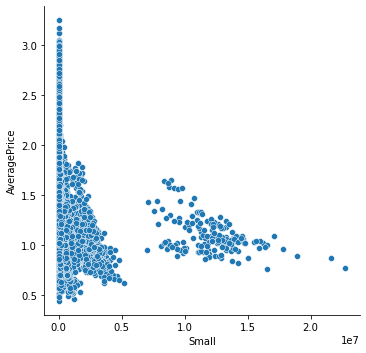

In [12]:
#Lets check how Small(4046) affects average price
sns.relplot(x = "Small", y = "AveragePrice", data = df)
plt.show()

* Here we can see the average price is maximum at total number of avocados with small size is under 50000. And above this range the price is between 0.7 to 1.5

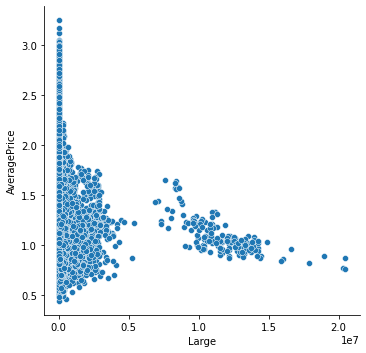

In [13]:
#Lets check how Large(4225) affects average price
sns.relplot(x = "Large", y = "AveragePrice", data = df)
plt.show()

* Here we can see the average price is maximum at total number of avocados with large size is under 50000. And above this range the price is between 0.7 to 1.7

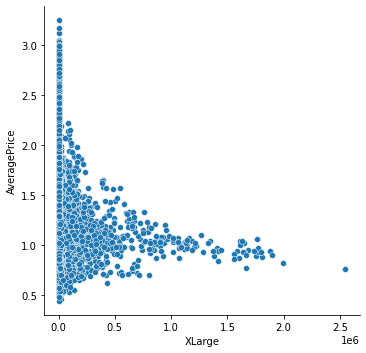

In [14]:
#Lets check how XLarge(4770) affects average price
sns.relplot(x = "XLarge", y = "AveragePrice", data = df)
plt.show()

* Here we can see the average price is maximum at total number of avocados with XLarge size is under 60000. And above this range the price is between 0.7 to 1.3

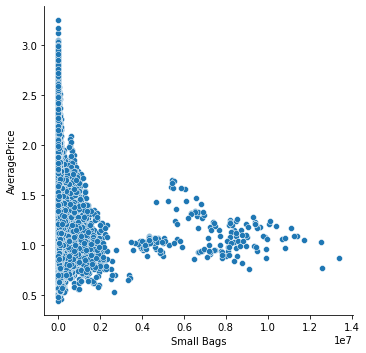

In [15]:
#Lets check how Small Bags affects average price
sns.relplot(x = "Small Bags", y = "AveragePrice", data = df)
plt.show()

*  when number small bags sold is below  20000 the average price is maximum. It says when we sell avocados in less quantity we will get more price.

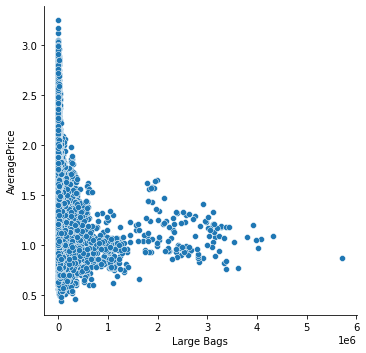

In [16]:
#Lets check how Large Bags affects average price
sns.relplot(x = "Large Bags", y = "AveragePrice", data = df)
plt.show()

We can say number of large bags sold is seen in the range in 0 to 400000.

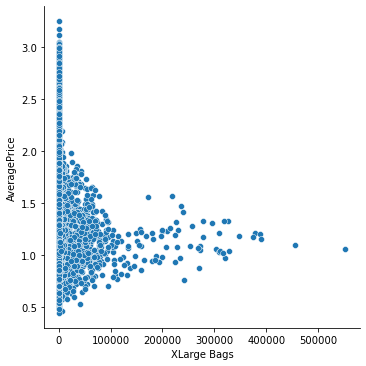

In [17]:
#Lets check how XLarge Bags affects average price
sns.relplot(x = "XLarge Bags", y = "AveragePrice", data = df)
plt.show()

* Here when number of XLarge bags sold is below 10000, then we will get more price for avocado.

<AxesSubplot:xlabel='type', ylabel='count'>

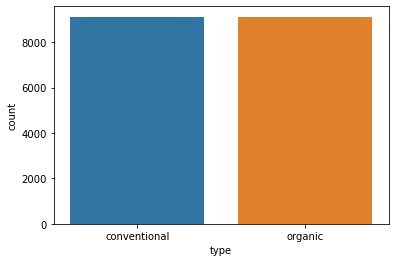

In [18]:
#Lets check the cuoun of conventional and organic avocados
sns.countplot(df["type"])

* There are almost equal number of conventional and organic type of avocados

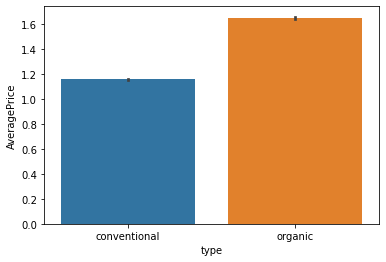

In [19]:
# lets check the average price based on type
sns.barplot(x = "type", y = "AveragePrice", data = df)
plt.show()

* organic avocado is more expensive as a standard compared to conventional one.

In [20]:
#Lets check the unique values in region column
df["region"].value_counts()

LasVegas               338
Tampa                  338
Nashville              338
GreatLakes             338
Louisville             338
Orlando                338
California             338
HartfordSpringfield    338
Denver                 338
Chicago                338
PhoenixTucson          338
SouthCentral           338
Jacksonville           338
Portland               338
RichmondNorfolk        338
Pittsburgh             338
Spokane                338
MiamiFtLauderdale      338
Midsouth               338
Boston                 338
Plains                 338
Detroit                338
Columbus               338
BuffaloRochester       338
Indianapolis           338
Northeast              338
StLouis                338
NewOrleansMobile       338
SanFrancisco           338
Syracuse               338
RaleighGreensboro      338
Philadelphia           338
Charlotte              338
CincinnatiDayton       338
Atlanta                338
Roanoke                338
DallasFtWorth          338
S

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

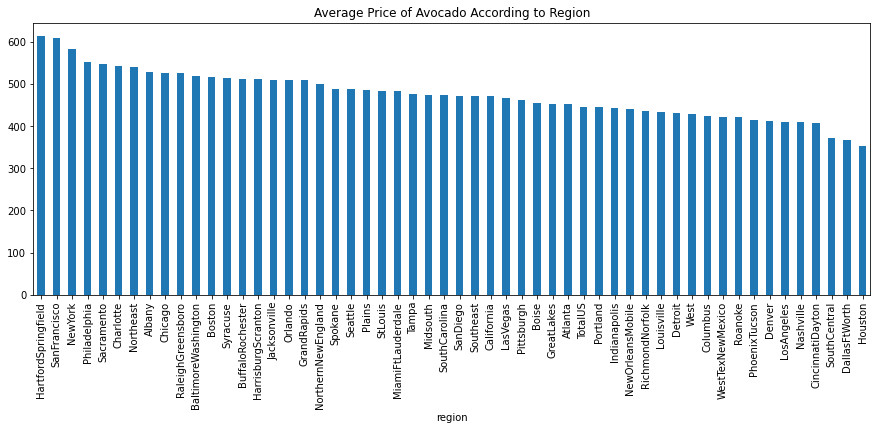

In [21]:
#Lets see how average price varies across every region
df.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))
plt.title('Average Price of Avocado According to Region')

* AveragePrice Price of avocado varies from one region to another 

* HartfordSpringfield being highest and Houston being lowest price to get cheap Avocado.



<AxesSubplot:xlabel='Year', ylabel='AveragePrice'>

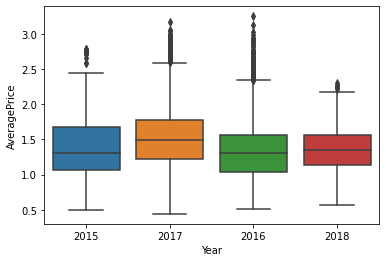

In [22]:
#Lets check average price in every year 
sns.boxplot(x="Year", y="AveragePrice", data=df)

* We notice the average price was high in 2017 compared to other years.

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

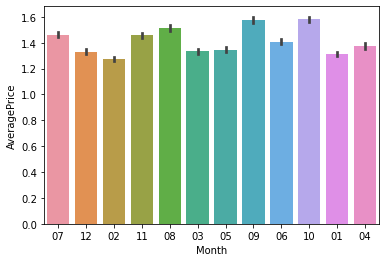

In [23]:
#Lets see what is the average price af avocado in every month
sns.barplot(x="Month", y="AveragePrice", data=df)

* From this plot we can say that the average price of the avocado will have significantly higher value in the month of august, september and october compared to other months average price.

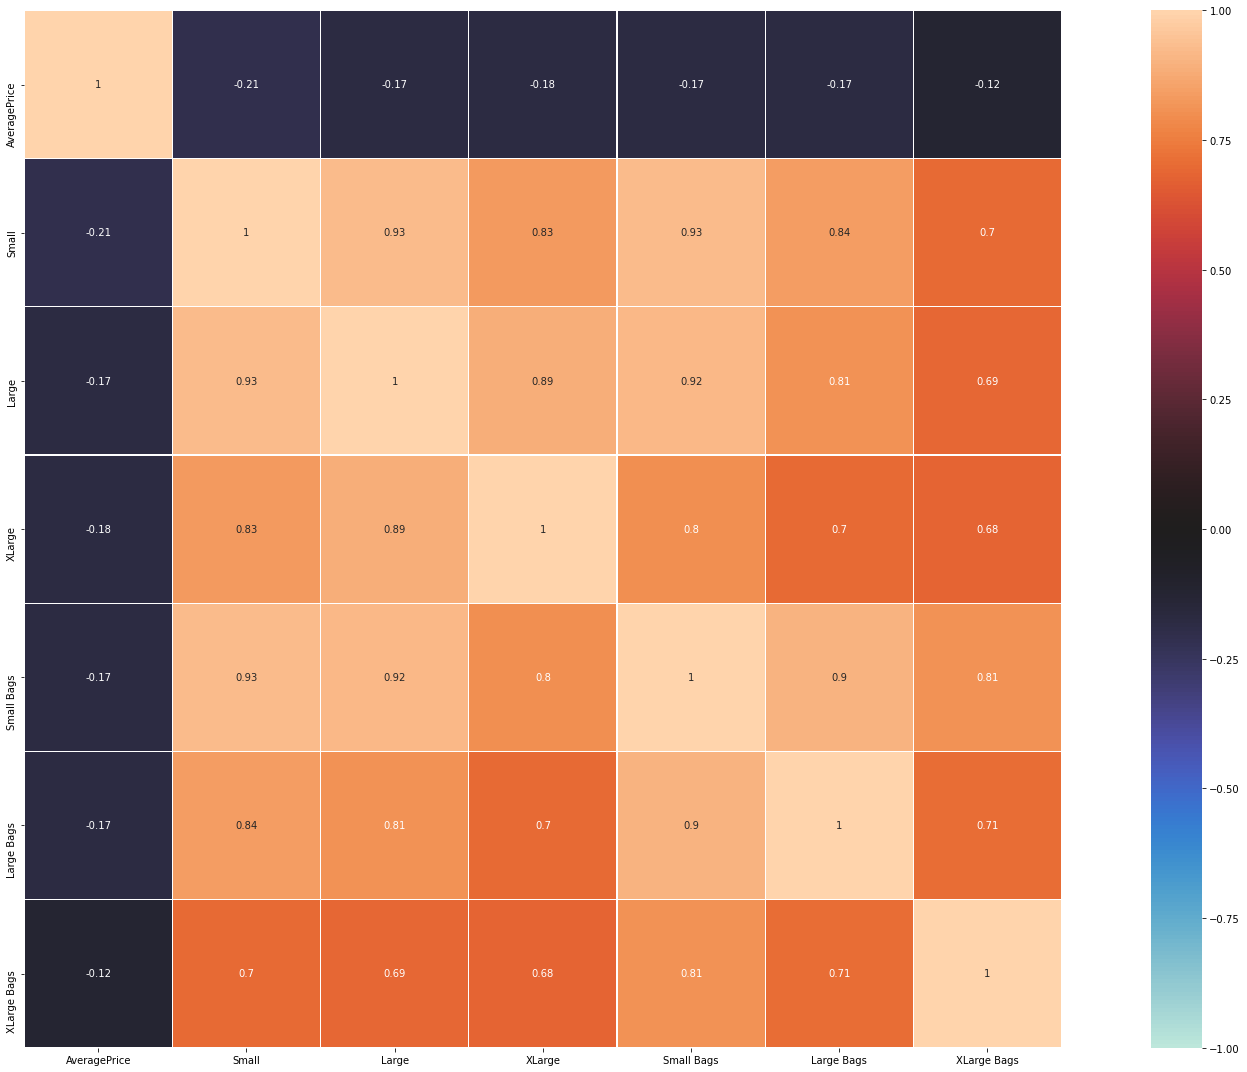

In [24]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (25,15))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidths=0.1)
plt.tight_layout()

* By seeing this heatmap we can say almost every feature is strongly related to some features.

* And we can observe all features are having negative coefficient of correlation with average price

In [25]:
#Lets check descrption of our data
df.describe()

,AveragePrice,Small,Large,XLarge,Small Bags,Large Bags,XLarge Bags
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000
mean,1.405978,2.930084e+05,2.951546e+05,2.283974e+04,1.821947e+05,5.433809e+04,3106.426507
std,0.402677,1.264989e+06,1.204120e+06,1.074641e+05,7.461785e+05,2.439660e+05,17692.894652
min,0.440000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.100000,8.540700e+02,3.008780e+03,0.000000e+00,2.849420e+03,1.274700e+02,0.000000
50%,1.370000,8.645300e+03,2.906102e+04,1.849900e+02,2.636282e+04,2.647710e+03,0.000000
75%,1.660000,1.110202e+05,1.502069e+05,6.243420e+03,8.333767e+04,2.202925e+04,132.500000
max,3.250000,2.274362e+07,2.047057e+07,2.546439e+06,1.338459e+07,5.719097e+06,551693.650000


* This will tell us there are presence of outliers in every columns, as the data is much differing from minimum to mean and maximum.

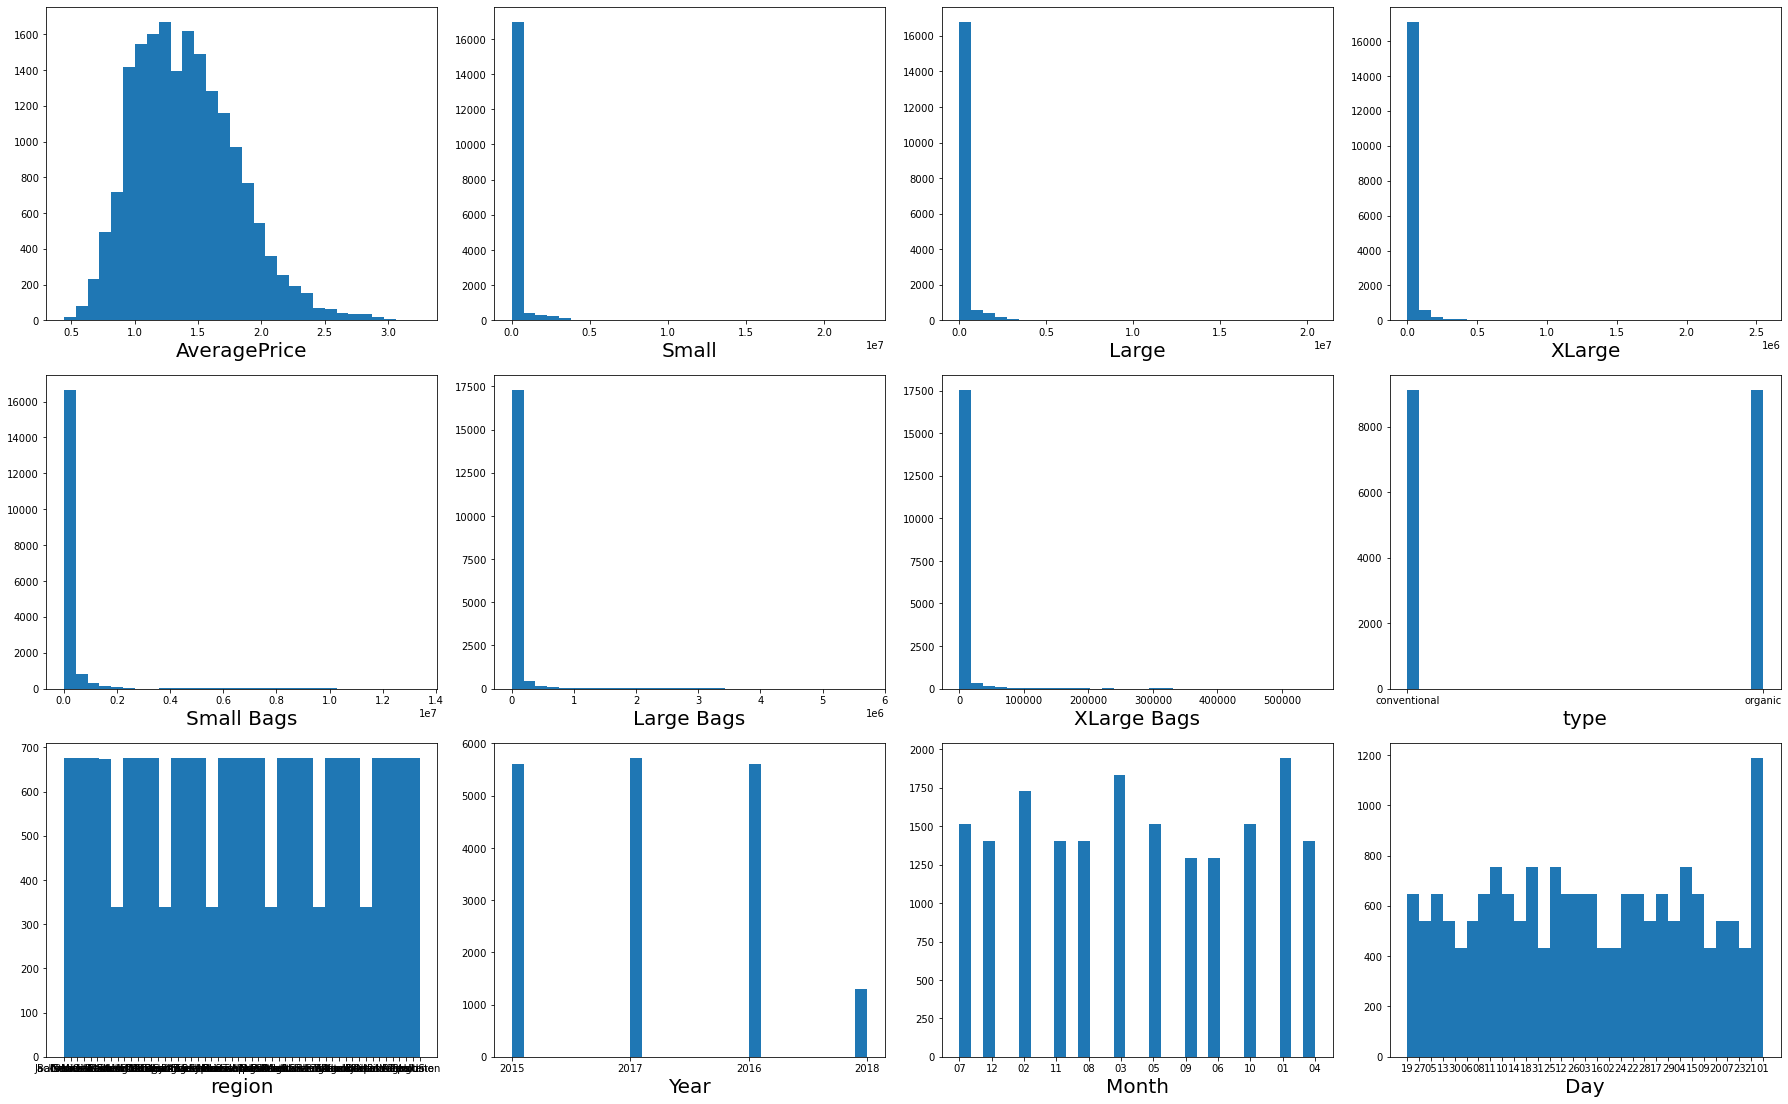

In [26]:
#Lets have a look on distribution of continuous parameters
plt.figure(figsize = (25,20))
plotnumber = 1
for column in df:
    if plotnumber <=13:
        ax = plt.subplot(4,4,plotnumber)
        plt.hist(df[column], bins=30)
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

* Average price column is normally distributing over the histogram.

* Rest of the data are not much varying in term of numbers, so they are showing skewness.

In [27]:
#Lets check the skewness present in our dataset
df.skew()

AveragePrice     0.580303
Small            8.648220
Large            8.942466
XLarge          10.159396
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Year             0.215339
Month            0.106617
Day              0.014310
dtype: float64

* I think due to presence of outliers in the dataset, its showing larger skewness

In [28]:
#lets remove outliers using zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["Small","Large","XLarge","Small Bags","Large Bags","XLarge Bags"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [29]:
#Lets check the shape of our dataset after removal of outliers, to check loss of data
df.shape

(17782, 13)

* By removing outliers from dataset we are loosing 2.5% of data, for better results we will remove outliers.

In [30]:
#lets drop index column as it in not needed prediction
col = ["index"]
df.drop(columns = col, inplace = True )

In [31]:
# Again check the skewness after removing outliers
df.skew()
#we can see after removing outliers also there is significant skewness is present
#we need to treat this skewness for better results

AveragePrice    0.560969
Small           4.928850
Large           4.472729
XLarge          5.137120
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
Year            0.220792
Month           0.098217
Day             0.011251
dtype: float64

In [32]:
#lets seperat our data into label and features
#Also remove column "Day" from features as its not contributng significantly to price 
x = df.drop(columns = ["AveragePrice", "Day"], axis = 1)
y = df["AveragePrice"]

In [33]:
#Lets treat the skewed data
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [34]:
#lets have a look skewness after treating
x.skew()

Small         -0.408827
Large          0.113631
XLarge         0.079074
Small Bags     0.070202
Large Bags     0.271867
XLarge Bags    1.225926
Year           0.220792
Month          0.098217
dtype: float64

we removed much of skewed data from our dataset.

In [35]:
#Lets bring Numerical features to common scale and convert categorical data to numerics
#First create a dataset with only numerical features
numeric_data = x.drop(columns = ["type","region"])

In [36]:
#Apply standard scaler to numerical features
scaler = StandardScaler()
x_num = scaler.fit_transform(numeric_data)
x_num = pd.DataFrame(x_num,columns=numeric_data.columns)

In [37]:
#lets see how our numerical data looks after scaling
x_num

,Small,Large,XLarge,Small Bags,Large Bags,XLarge Bags,Year,Month
0,0.857897,0.001137,0.401673,-0.046919,0.767302,-0.624920,-1.214908,0.227794
1,-0.500771,-1.098501,-0.564050,-1.575710,0.243830,-0.624920,-1.214908,1.641434
2,-0.126813,0.454982,-1.208956,0.011475,1.236115,-0.624920,0.914459,-1.185845
3,1.369223,1.606999,1.653867,1.774365,1.519091,1.730633,-0.150224,1.358706
4,-0.307867,-0.572771,0.426456,-0.641949,-1.326978,-0.624920,-1.214908,0.510522
...,...,...,...,...,...,...,...,...
17777,1.053534,0.059328,0.484452,0.861533,1.241801,1.881438,0.914459,1.358706
17778,-0.501068,-1.792705,-1.208956,-1.084082,-1.365289,-0.624920,-1.214908,-1.185845
17779,0.113898,-1.416122,-1.208956,0.086670,-0.640824,-0.624920,-0.150224,0.510522
17780,1.722923,2.337870,1.835589,1.699427,0.605160,1.972155,-1.214908,0.793250


In [38]:
#create a dataset with categorical features
cat_data = pd.DataFrame(x, columns = ["type","region"])

In [39]:
#lets convert categorical data into numeric values, using label encoder
from sklearn.preprocessing import LabelEncoder

leb_enc = LabelEncoder()
for i in cat_data.columns:
    cat_data[i] = leb_enc.fit_transform(cat_data[i])

In [40]:
#Now  join both categorical and numerical features detasets
X = x_num.join(cat_data)
X

,Small,Large,XLarge,Small Bags,Large Bags,XLarge Bags,Year,Month,type,region
0,0.857897,0.001137,0.401673,-0.046919,0.767302,-0.624920,-1.214908,0.227794,0,20
1,-0.500771,-1.098501,-0.564050,-1.575710,0.243830,-0.624920,-1.214908,1.641434,1,48
2,-0.126813,0.454982,-1.208956,0.011475,1.236115,-0.624920,0.914459,-1.185845,1,15
3,1.369223,1.606999,1.653867,1.774365,1.519091,1.730633,-0.150224,1.358706,0,25
4,-0.307867,-0.572771,0.426456,-0.641949,-1.326978,-0.624920,-1.214908,0.510522,1,2
...,...,...,...,...,...,...,...,...,...,...
17777,1.053534,0.059328,0.484452,0.861533,1.241801,1.881438,0.914459,1.358706,0,1
17778,-0.501068,-1.792705,-1.208956,-1.084082,-1.365289,-0.624920,-1.214908,-1.185845,1,31
17779,0.113898,-1.416122,-1.208956,0.086670,-0.640824,-0.624920,-0.150224,0.510522,1,11
17780,1.722923,2.337870,1.835589,1.699427,0.605160,1.972155,-1.214908,0.793250,0,6


## Finding best randomstate

In [41]:
#Lets find best random state using KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
max_r_score=0
r_state = 0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state = r_state)
    kn = KNeighborsRegressor()
    kn.fit(x_train,y_train)
    y_pred = kn.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.874009043327366 on Random State 1


In [42]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.30,random_state = r_state)

In [43]:
#Model with LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
pred_lr = lr.predict(x_test)

#evaluation
mse = mean_squared_error(y_test,pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_lr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_lr)*100}%")

MAE : 0.22028360577074016
RMSE : 0.28319839969369337
Training r2 Score : 50.21269744260992 %
Testing r2 Score: 51.129802172372905%


In [44]:
#Model with DecesionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred = dt.predict(x_train)
pred_dt = dt.predict(x_test)

#evaluation
mse = mean_squared_error(y_test,pred_dt)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_dt)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_dt)*100}%")

MAE : 0.12870665417057173
RMSE : 0.20044631550196434
Training r2 Score : 100.0 %
Testing r2 Score: 75.51733654781665%


In [45]:
#Model with RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_train)
pred_rf = rf.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_rf)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_rf)
print("MAE :", mae)
print("RMSE :", rmse)


# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_rf)*100}%")

MAE : 0.09752395501405811
RMSE : 0.14062020483379215
Training r2 Score : 98.34604473598185 %
Testing r2 Score: 87.9508070313443%


In [46]:
#Model with KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knr =  KNeighborsRegressor()
knr.fit(x_train, y_train)
y_pred = knr.predict(x_train)
pred_knr = knr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_knr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_knr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_knr)*100}%")

MAE : 0.10277113402061858
RMSE : 0.14748264905174935
Training r2 Score : 91.87819548701984 %
Testing r2 Score: 86.74607933471889%


In [47]:
#Lets use SVM regressor
from sklearn.svm import SVR
svr =  KNeighborsRegressor()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_train)
pred_svr = svr.predict(x_test)

# evaluation
mse = mean_squared_error(y_test,pred_svr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred_svr)
print("MAE :", mae)
print("RMSE :", rmse)

# r2 score
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred_svr)*100}%")

MAE : 0.10277113402061858
RMSE : 0.14748264905174935
Training r2 Score : 91.87819548701984 %
Testing r2 Score: 86.74607933471889%


* Looking at the r2 scores of every algorithms, we can say the RandomForestRegressor is giving maximum r2 score and minimum rmse. 
* Lets go for cross validation to check overfitting problem.

## Cross validation

In [48]:
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
#for  LinearRegression model
lr = LinearRegression()
c_scores = cross_val_score(lr,X,y,cv=5, scoring = 'r2')
print("Cross validation score of LinearRegression model is :", c_scores.mean())

Cross validation score of LinearRegression model is : 0.5045457893986164


In [49]:
#for  DecisionTreeRegressor model
dt = DecisionTreeRegressor()
c_scores = cross_val_score(dt,X,y,cv=5, scoring = 'r2')
print("Cross validation score of DecisionTreeRegressor model is :", c_scores.mean())

Cross validation score of DecisionTreeRegressor model is : 0.7630405043541952


In [50]:
#for RandomForestRegressor model
c_scores = cross_val_score(rf,X,y,cv=5, scoring = 'r2')
print("Cross validation score of RandomForestRegressor model is :", c_scores.mean())

Cross validation score of RandomForestRegressor model is : 0.8901387405351597


In [51]:
#for KNeighborsRegressor model
c_scores = cross_val_score(knr,X,y,cv=5, scoring = 'r2')
print("Cross validation score of KNeighborsRegressor model is :", c_scores.mean())

Cross validation score of KNeighborsRegressor model is : 0.8757665670632642


In [52]:
#for SVM Regressor model
c_scores = cross_val_score(svr,X,y,cv=5, scoring = 'r2')
print("Cross validation score of SVM Regressor model is :", c_scores.mean())

Cross validation score of SVM Regressor model is : 0.8757665670632642


* We can see the minimum difference in r2 score and cv score for randomforestregresor, SVM and KNeighborsRegressor is same of 0.73%. 
* By taking into consideration time required for hyperparameter tuning for RandomForestRegressor is very much high. so I am prefering KNeighborsRegressor for further process

## Hyperparameter Tuning

In [53]:
grid_params = {
                'algorithm' : ['auto', 'kd_tree','ball_tree','brute'],
                'weights': ['uniform','distance'],
                'leaf_size':[15,18,20],
                'n_neighbors': [3,5,7,13]
                }

In [54]:
GCV =  GridSearchCV(KNeighborsRegressor(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'kd_tree', 'ball_tree', 'brute'],
                         'leaf_size': [15, 18, 20],
                         'n_neighbors': [3, 5, 7, 13],
                         'weights': ['uniform', 'distance']})

In [55]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 3, 'weights': 'distance'}

In [56]:
#Let's train and test our model using best parameters
model = KNeighborsRegressor(algorithm = 'auto', leaf_size = 15, n_neighbors = 3, weights = 'distance' )

model.fit(x_train,y_train)
pred = model.predict(x_test)
y_pred = model.predict(x_train)
# evaluation
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)

print("MAE :", mae)
print("RMSE :", rmse)
print("---------------------------------------------------")

#r2 scores
print("Training r2 Score :", r2_score(y_train,y_pred)*100,'%')
print(f"Testing r2 Score: {r2_score(y_test,pred)*100}%")

MAE : 0.09221969377831055
RMSE : 0.13581486914627047
---------------------------------------------------
Training r2 Score : 100.0 %
Testing r2 Score: 88.76023719462368%


This is the final model for average price prediction of avocados

- __Lets see final Actual Vs Predicted sample.__

,Y Test,Pred
10718,1.38,1.378667
3049,0.76,0.832338
16084,1.32,1.574522
6565,1.59,1.622797
4919,0.93,1.100100


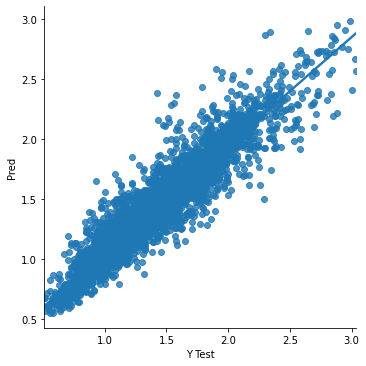

In [57]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

## Saving the model

In [58]:
import joblib
joblib.dump(model,"Avocado_price_prediction.pkl")

['Avocado_price_prediction.pkl']